In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Graph Config
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# Clustering

### Clastering k-means

### k-means - one of the algorithms of the probabilistic approach

In other words, K-means compare data with a sample and separate data into clusters

In [2]:
from sklearn.cluster import KMeans

# n_clusters - into how many groups split data

model = KMeans(n_clusters=3, random_state=100)

### Create working Dataset

In [3]:
# n = n_clusters
# seed - spots_Qty

def make_data(n, seed):
    np.random.seed(seed)
    shift_matrix = np.array([[3,3],[6,9],[9,3]])
    
    data = np.random.randn(3,2,n) + shift_matrix.reshape((3,2,1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])
    
    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
                     columns=['x', 'y'])
    df = df.sample (frac=1.0)
    return df

In [4]:
# Dataset_1 - Training

train = make_data(10, 42)

In [5]:
# Dataset_2 - Testing

test = make_data(10,27)

### Create Train Graph

Text(0.5, 1.0, 'Train')

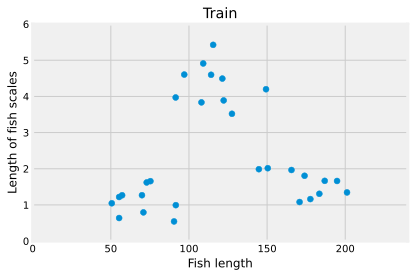

In [6]:
plt.scatter(train['x'], train['y'])

# Set size limit for axis
plt.xlim(0, 240)
plt.ylim(0, 6)

# Name axis
plt.xlabel('Fish length')
plt.ylabel('Length of fish scales')

# Graph name
plt.title('Train')

### Data Normalization

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [8]:
train_scaled = scaler.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled, columns = ['x', 'y'])

Text(0.5, 1.0, 'Train')

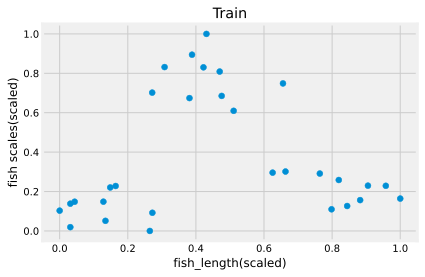

In [9]:
plt.scatter(train_scaled['x'], train_scaled['y'])
plt.xlabel('fish_length(scaled)')
plt.ylabel('fish scales(scaled)')
plt.title('Train')

### Train a model

In [10]:
train_labels = model.fit_predict(train_scaled)

In [11]:
train_labels

array([2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0,
       1, 1, 2, 2, 2, 0, 1, 1], dtype=int32)

### Center of Cluster

In [12]:
model.cluster_centers_

array([[0.4314873 , 0.77857028],
       [0.12190576, 0.11495728],
       [0.82595794, 0.21634417]])

In [13]:
# Display centers in previous position

centers = scaler.inverse_transform(model.cluster_centers_)
centers

array([[115.56312871,   4.34494667],
       [ 68.96122223,   1.10467088],
       [174.94355655,   1.59972071]])

### Build Graph with sep. clusters

Text(0.5, 1.0, 'Train')

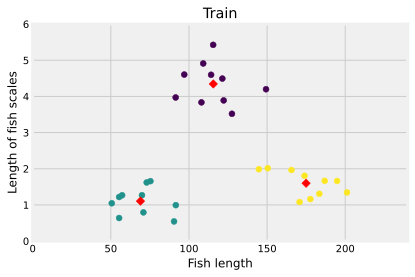

In [14]:
plt.scatter(train['x'], train['y'], c=train_labels)

# split with color
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

# set limit on axis
plt.xlim(0, 240)
plt.ylim(0, 6)

# Name axis
plt.xlabel('Fish length')
plt.ylabel('Length of fish scales')

# Graph name
plt.title('Train')

### Intertia - Distance between center and dots that belong to this cluster, the smaller distance are better

Inertia of graph above

In [15]:
model.inertia_

0.5417377477488049

### It's always better to find a balance between cluster_qty and intertia_value

In [16]:
# i - cluster Qty

inertia_arr = []
for i in range(2, 10):
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(train_scaled)
    temp_intertia = temp_model.inertia_
    print(temp_intertia)
    inertia_arr.append(temp_intertia)

2.9002641632095463
0.5417377477488049
0.4281736891174851
0.3258659915567972
0.26736166193637667
0.2072579445597765
0.16774172223409062
0.1467127247607685


### Display results on Graph

Text(0.5, 1.0, 'intertia')

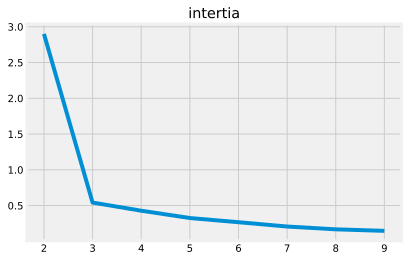

In [17]:
plt.plot([i for i in range(2, 10)], inertia_arr)
plt.title('intertia')

From graph we can see that 3 clusters is good no.

### Use the same process to test dataset

In [18]:
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled, columns=['x', 'y'])

In [19]:
test_labels = model.predict(test_scaled)

In [20]:
test_labels

array([1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1,
       2, 2, 1, 0, 0, 1, 0, 2], dtype=int32)

Text(0.5, 1.0, 'Test')

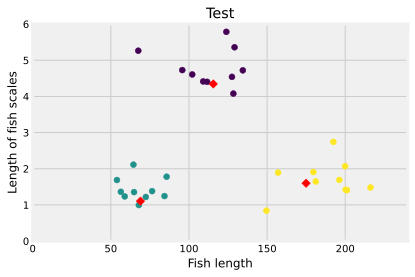

In [21]:
plt.scatter(test['x'], test['y'], c=test_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')
plt.xlim(0, 240)
plt.ylim(0, 6)
# Name axis
plt.xlabel('Fish length')
plt.ylabel('Length of fish scales')

# Graph name
plt.title('Test')

## AgglomerativeClustering

Agglomerative algorithms - combine small clusters into a bigger one

Divisional algorithms - First, all data is counted as one big cluster, then this cluster is divided into a more small one

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
# n_clusters = qty founded in the graph inertia

model = AgglomerativeClustering(n_clusters=3)

In [24]:
# train model

train_labels = model.fit_predict(train_scaled)

In [25]:
train_labels

array([0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2,
       1, 1, 0, 0, 0, 2, 1, 1])

### Create Graph Based on Results

Text(0.5, 1.0, 'Train')

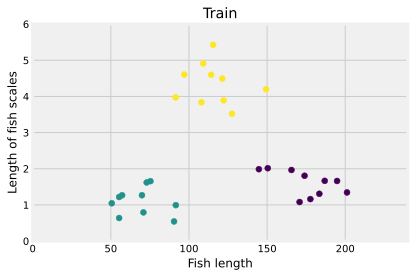

In [26]:
plt.scatter(train['x'], train['y'], c=train_labels)

# Set size limit for axis
plt.xlim(0, 240)
plt.ylim(0, 6)

# Name axis
plt.xlabel('Fish length')
plt.ylabel('Length of fish scales')

# Graph name
plt.title('Train')

## KNeighborsClassifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)

In [29]:
knn.fit(train_scaled, train_labels)

KNeighborsClassifier()

In [30]:
test_labels

array([1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1,
       2, 2, 1, 0, 0, 1, 0, 2], dtype=int32)

### Build Graph

Text(0.5, 1.0, 'Test')

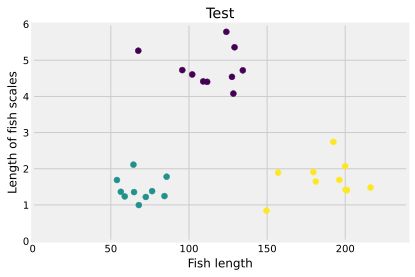

In [31]:
plt.scatter(test['x'], test['y'], c=test_labels)

# Set size limit for axis
plt.xlim(0, 240)
plt.ylim(0, 6)

# Name axis
plt.xlabel('Fish length')
plt.ylabel('Length of fish scales')

# Graph name
plt.title('Test')